# Decision Tree Lab

In [194]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


## 1 Debug and Eval

### 1.1 (5%) Debug 

- Train a DecisionTreeClassifier on the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff) using all default parameters.
- If using Dataframes you may want to change the class values from bytecodes to strings with
iris_df['class'] = iris_df['class'].str.decode('utf-8') 

Expected Accuracy = [1.0]


In [195]:
Data_Set = arff.loadarff(f'datasets/iris.arff')
df = pd.DataFrame(Data_Set[0])

display(df.head(3))


# Data_Set_np = Data_Set_df.to_numpy()
# Data_Set_np = Data_Set_np.astype(str)
X = df.drop('class', axis=1).to_numpy()
y = df['class'].astype(str).to_numpy()
# # X = Data_Set_np[:, :-1]
# # y = Data_Set_np[:, -1]
# return [X, y]

X_iris = X
y_iris = y

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

print(f"X x_test: {len(x_test)}")
display(len(x_train))

print(f"y y_test {len(y_test)}")
display(len(y_train))

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,b'Iris-setosa'
1,4.9,3.0,1.4,0.2,b'Iris-setosa'
2,4.7,3.2,1.3,0.2,b'Iris-setosa'


X x_test: 23


127

y y_test 23


127

In [196]:
#Debug



iris_clf = DecisionTreeClassifier()

iris_clf.fit(x_train, y_train)

print(f"Score: {iris_clf.score(x_test, y_test)}")

# iris = load_iris()
# cross_val_score(clf, X, y, cv=10)


Score: 0.9130434782608695


### 1.2 (5%) Evaluation 

- Train on the iris data set again but this time with max_depth = 3 and output the accuracy

In [197]:
# Evaluation

clf = DecisionTreeClassifier(max_depth=3)

clf.fit(x_train, y_train)

print(f"Score: {clf.score(x_test, y_test)}")

Score: 0.9130434782608695


#### Discussion
What did you see? What were the differences in accuracy between the two trained models? How do you account for the differences or no differences? 

** Your discussion goes here **

For both of the runs, the accuracy was 91%. My theory for no difference is because the max_depth of 3 is still good enough to get 91% accuracy. When I go to a max_depth=2, then I start loosing accuracy.

## 2. Missing Values, N-fold CV, and Decision Tree Items  

### 2.1 (15%) Handling missing values
- Use this [Voting Dataset with missing values](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting_with_missing.arff)
- This data set has missing data.  Create an extra feature value for each feature with missing data. For example, if the feature were color with possible values R, G, B, you would add a fourth value (e.g. U or ? for unknown).
- Do not use a stopping criteria. Induce the tree as far as it can go (until classes are pure or there are no more data or attributes to split on).
- SKlearn does not allow nominal features, which initially seems odd. However, SKlearn uses the binary CART algorithm where a nominal data value like color is broken down into blue or not blue, red or not red, etc.  It is thus natural to just use one-hot encoding for each nominal feature.
- Use an 80/20 train/test split.
- Report the training and test set accuracies.

In [198]:
# Import the dataset

Data_Set = arff.loadarff(f'datasets/voting_with_missing.arff')
df = pd.DataFrame(Data_Set[0])

display(df["handicapped-infants"].value_counts())

display(df.head())


df = df.replace({
    b'n': 'no',
    b'y': 'yes',
    b'?': 'unknown',
    b'republican': 'republican',
    b'democrat': 'democrat'
}).astype(str)

display(df.head())

X = pd.get_dummies(df.drop('Class', axis=1)).to_numpy()
y = df['Class'].to_numpy()

X_voting = X
y_voting = y

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


handicapped-infants
b'n'    236
b'y'    187
b'?'     12
Name: count, dtype: int64

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,b'n',b'y',b'n',b'y',b'y',b'y',b'n',b'n',b'n',b'y',b'?',b'y',b'y',b'y',b'n',b'y',b'republican'
1,b'n',b'y',b'n',b'y',b'y',b'y',b'n',b'n',b'n',b'n',b'n',b'y',b'y',b'y',b'n',b'?',b'republican'
2,b'?',b'y',b'y',b'?',b'y',b'y',b'n',b'n',b'n',b'n',b'y',b'n',b'y',b'y',b'n',b'n',b'democrat'
3,b'n',b'y',b'y',b'n',b'?',b'y',b'n',b'n',b'n',b'n',b'y',b'n',b'y',b'n',b'n',b'y',b'democrat'
4,b'y',b'y',b'y',b'n',b'y',b'y',b'n',b'n',b'n',b'n',b'y',b'?',b'y',b'y',b'y',b'y',b'democrat'


,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,no,yes,no,yes,yes,yes,no,no,no,yes,unknown,yes,yes,yes,no,yes,republican
1,no,yes,no,yes,yes,yes,no,no,no,no,no,yes,yes,yes,no,unknown,republican
2,unknown,yes,yes,unknown,yes,yes,no,no,no,no,yes,no,yes,yes,no,no,democrat
3,no,yes,yes,no,unknown,yes,no,no,no,no,yes,no,yes,no,no,yes,democrat
4,yes,yes,yes,no,yes,yes,no,no,no,no,yes,unknown,yes,yes,yes,yes,democrat


In [199]:
# Learn Voting with missing values.

voting_clf = DecisionTreeClassifier()

voting_clf.fit(x_train, y_train)

print(f"Score: {voting_clf.score(x_test, y_test)}")

Score: 0.9310344827586207


#### Discussion
Report on your accuracies and include explaining how the missing values were handled by your model

** Your discussion goes here **

It appears as though my model was able to get about a 90% ~ 94% accuracy rate on the test set. The way that I handeled missing values was that anywere there was a missing value, I created that as a new catigory that was one-hot encoded. That way, if tested on a test set that had a missing value, it would be able to handle that correctly because it had seen it before.

### 2.2 (15%)  N-fold Cross Validation
- Learn the [Cars Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/cars.arff) with the decision tree.
- Create a table with the 10-fold cross validation accuracies and show the average predicted accuracy.
- Try it again with 5-fold CV and create and show that table also.

In [200]:
from sklearn.model_selection import cross_val_score

Data_Set = arff.loadarff(f'datasets/cars.arff')
df = pd.DataFrame(Data_Set[0])

display(df.head())

df = df.replace({
    b'vhigh': 3,
    b'high': 2,
    b'med': 1,
    b'low': 0,
    b'2': 2,
    b'3': 3,
    b'4': 4,
    b'more': 6,
    b'5more': 5,
    b'small': 0,
    b'low': 0,
    b'med': 1,
    b'big': 2,
    b'high': 2,
    b'unacc': 0,
    b'acc': 1,
    b'good': 2,
    b'vgood': 3,
}).astype(int)

display(df.head())

X = df.drop('class', axis=1).to_numpy()
y = df['class'].to_numpy()

X_cars = X
y_cars = y

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

cars_clf = DecisionTreeClassifier()

cars_clf.fit(x_train, y_train)



,buying,maint,doors,persons,lug_boot,safety,class
0,b'vhigh',b'vhigh',b'2',b'2',b'small',b'low',b'unacc'
1,b'vhigh',b'vhigh',b'2',b'2',b'small',b'med',b'unacc'
2,b'vhigh',b'vhigh',b'2',b'2',b'small',b'high',b'unacc'
3,b'vhigh',b'vhigh',b'2',b'2',b'med',b'low',b'unacc'
4,b'vhigh',b'vhigh',b'2',b'2',b'med',b'med',b'unacc'


/tmp/ipykernel_388901/1566803782.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({


,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [201]:
clf = DecisionTreeClassifier()

# clf.fit(X, y)



score_10 = cross_val_score(clf, X, y, cv=10)
score_5 = cross_val_score(clf, X, y, cv=5)

print(f"Score: {score_10}")
print(f"Score: {score_5}")

def plotstuff(score_list):

    count = 1

    for x in score_list:
        print(f"Fold: {count}, Score: {x}")
        count += 1

print("--------------------------------------")
print("Nice Print:")
plotstuff(score_10)
print("--------------------------------------")
plotstuff(score_5)



Score: [0.95953757 0.79190751 0.83236994 0.77456647 0.90751445 0.87861272
 0.91907514 0.92485549 0.95930233 0.86046512]
Score: [0.77745665 0.71098266 0.72543353 0.90434783 0.84637681]
--------------------------------------
Nice Print:
Fold: 1, Score: 0.9595375722543352
Fold: 2, Score: 0.791907514450867
Fold: 3, Score: 0.8323699421965318
Fold: 4, Score: 0.7745664739884393
Fold: 5, Score: 0.9075144508670521
Fold: 6, Score: 0.8786127167630058
Fold: 7, Score: 0.9190751445086706
Fold: 8, Score: 0.9248554913294798
Fold: 9, Score: 0.9593023255813954
Fold: 10, Score: 0.8604651162790697
--------------------------------------
Fold: 1, Score: 0.7774566473988439
Fold: 2, Score: 0.7109826589595376
Fold: 3, Score: 0.7254335260115607
Fold: 4, Score: 0.9043478260869565
Fold: 5, Score: 0.8463768115942029


#### Discussion
Explain n-fold cross validation. Why do we do it? How is it useful? What does it reveal? Do we end up with a model? If so, which one? 

** Your discussion goes here **

N-fold cross validation is used when we don't have a large enough of a dataset to warrent setting aside a large ammount of the data for testing and not for training. This is because if you have a really small dataset, sometimes you will only have one or 2 examples of a specific thing that you want your final model to learn. If that specific thing is in the test set, then your model is never going to learn it. Cross validation can reveal how important some of our data was by the ammount of change the final accurcy goes through from fold to fold. This way you can really see how important where the split of the sets was.

It appears that the 10 fold validation yealds higher accuracy results in this instance, so that is the model that will be used.

### 2.3 (10%) Decision Tree Intuition
For each of the two problems above (Voting and Cars):
- Print the full tree for each.  You may use tree.plot_tree(clf) or [another way](https://mljar.com/blog/visualize-decision-tree/) if you prefer.  tree.plot_tree has a number of parameters which you can try which let you print more informative trees which can help your discussion.
- Train both again with max_depth = 2 and print these smaller trees and include them in your report.
- Summarize in English what these 2 smaller decision trees have learned (i.e. look at the induced trees and describe what "rules" they discovered). 
- Compare your thoughts on important features with the attribute feature_importances_

In [202]:
from sklearn import tree

def train_tree(X, y, m=1000):
    clf = DecisionTreeClassifier(max_depth=m)
    clf.fit(X, y)
    return clf

[Text(0.4351851851851852, 0.9545454545454546, 'x[11] <= 0.5\ngini = 0.474\nsamples = 435\nvalue = [267, 168]'),
 Text(0.18518518518518517, 0.8636363636363636, 'x[7] <= 0.5\ngini = 0.038\nsamples = 258\nvalue = [253, 5]'),
 Text(0.3101851851851852, 0.9090909090909092, 'True  '),
 Text(0.07407407407407407, 0.7727272727272727, 'x[6] <= 0.5\ngini = 0.016\nsamples = 249\nvalue = [247.0, 2.0]'),
 Text(0.037037037037037035, 0.6818181818181818, 'gini = 0.0\nsamples = 224\nvalue = [224, 0]'),
 Text(0.1111111111111111, 0.6818181818181818, 'x[34] <= 0.5\ngini = 0.147\nsamples = 25\nvalue = [23, 2]'),
 Text(0.07407407407407407, 0.5909090909090909, 'x[15] <= 0.5\ngini = 0.08\nsamples = 24\nvalue = [23, 1]'),
 Text(0.037037037037037035, 0.5, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.1111111111111111, 0.5, 'x[44] <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.07407407407407407, 0.4090909090909091, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.14814814814814814, 0.40909

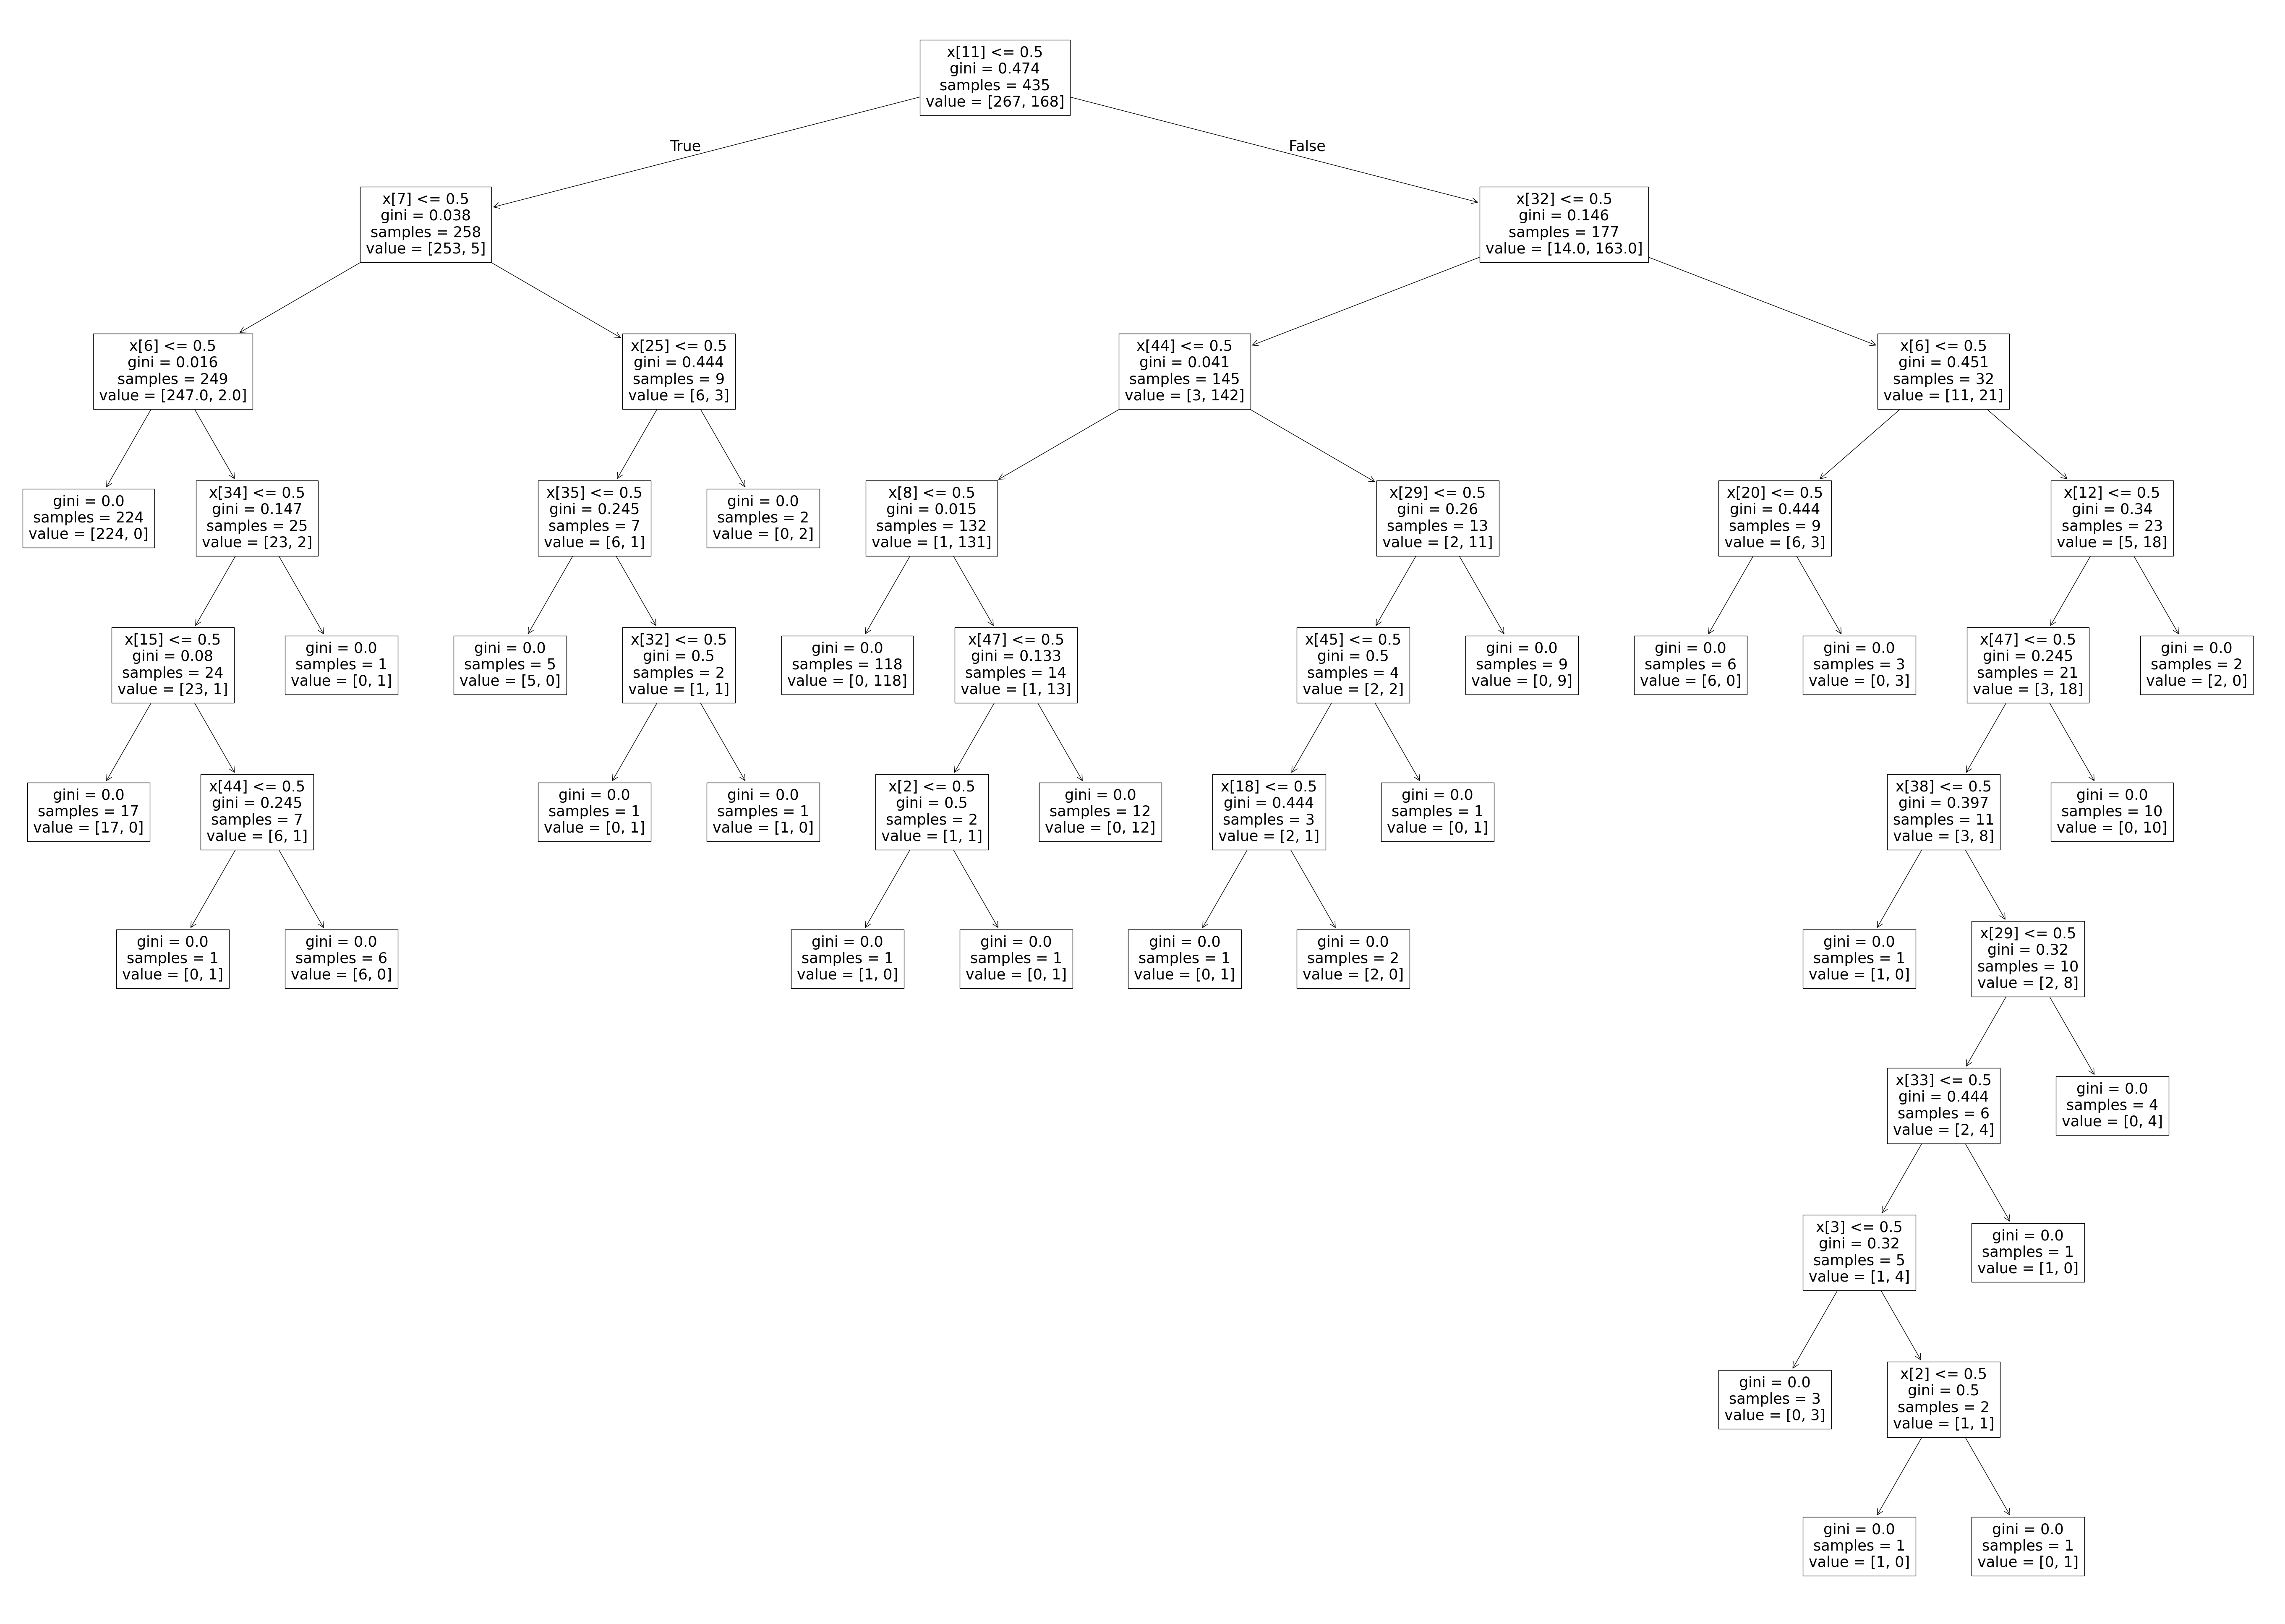

In [ ]:
#Print induced trees for the voting and car data sets

plt.figure(figsize=(70, 50))

# Voting Full Tree

voting_clf = train_tree(X_voting, y_voting)
display(tree.plot_tree(voting_clf))


# plt.savefig("tree.png", dpi=300)
# plt.show()


[Text(0.626233552631579, 0.9615384615384616, 'x[5] <= 0.5\ngini = 0.457\nsamples = 1728\nvalue = [1210, 384, 69, 65]'),
 Text(0.6130756578947368, 0.8846153846153846, 'gini = 0.0\nsamples = 576\nvalue = [576, 0, 0, 0]'),
 Text(0.619654605263158, 0.9230769230769231, 'True  '),
 Text(0.639391447368421, 0.8846153846153846, 'x[3] <= 3.0\ngini = 0.579\nsamples = 1152\nvalue = [634, 384, 69, 65]'),
 Text(0.6328125, 0.9230769230769231, '  False'),
 Text(0.626233552631579, 0.8076923076923077, 'gini = 0.0\nsamples = 384\nvalue = [384, 0, 0, 0]'),
 Text(0.6525493421052632, 0.8076923076923077, 'x[0] <= 1.5\ngini = 0.629\nsamples = 768\nvalue = [250, 384, 69, 65]'),
 Text(0.41036184210526316, 0.7307692307692307, 'x[1] <= 1.5\ngini = 0.642\nsamples = 384\nvalue = [46, 204, 69, 65]'),
 Text(0.20230263157894737, 0.6538461538461539, 'x[5] <= 1.5\ngini = 0.688\nsamples = 192\nvalue = [8, 63, 69, 52]'),
 Text(0.07894736842105263, 0.5769230769230769, 'x[4] <= 0.5\ngini = 0.528\nsamples = 96\nvalue = [4, 5

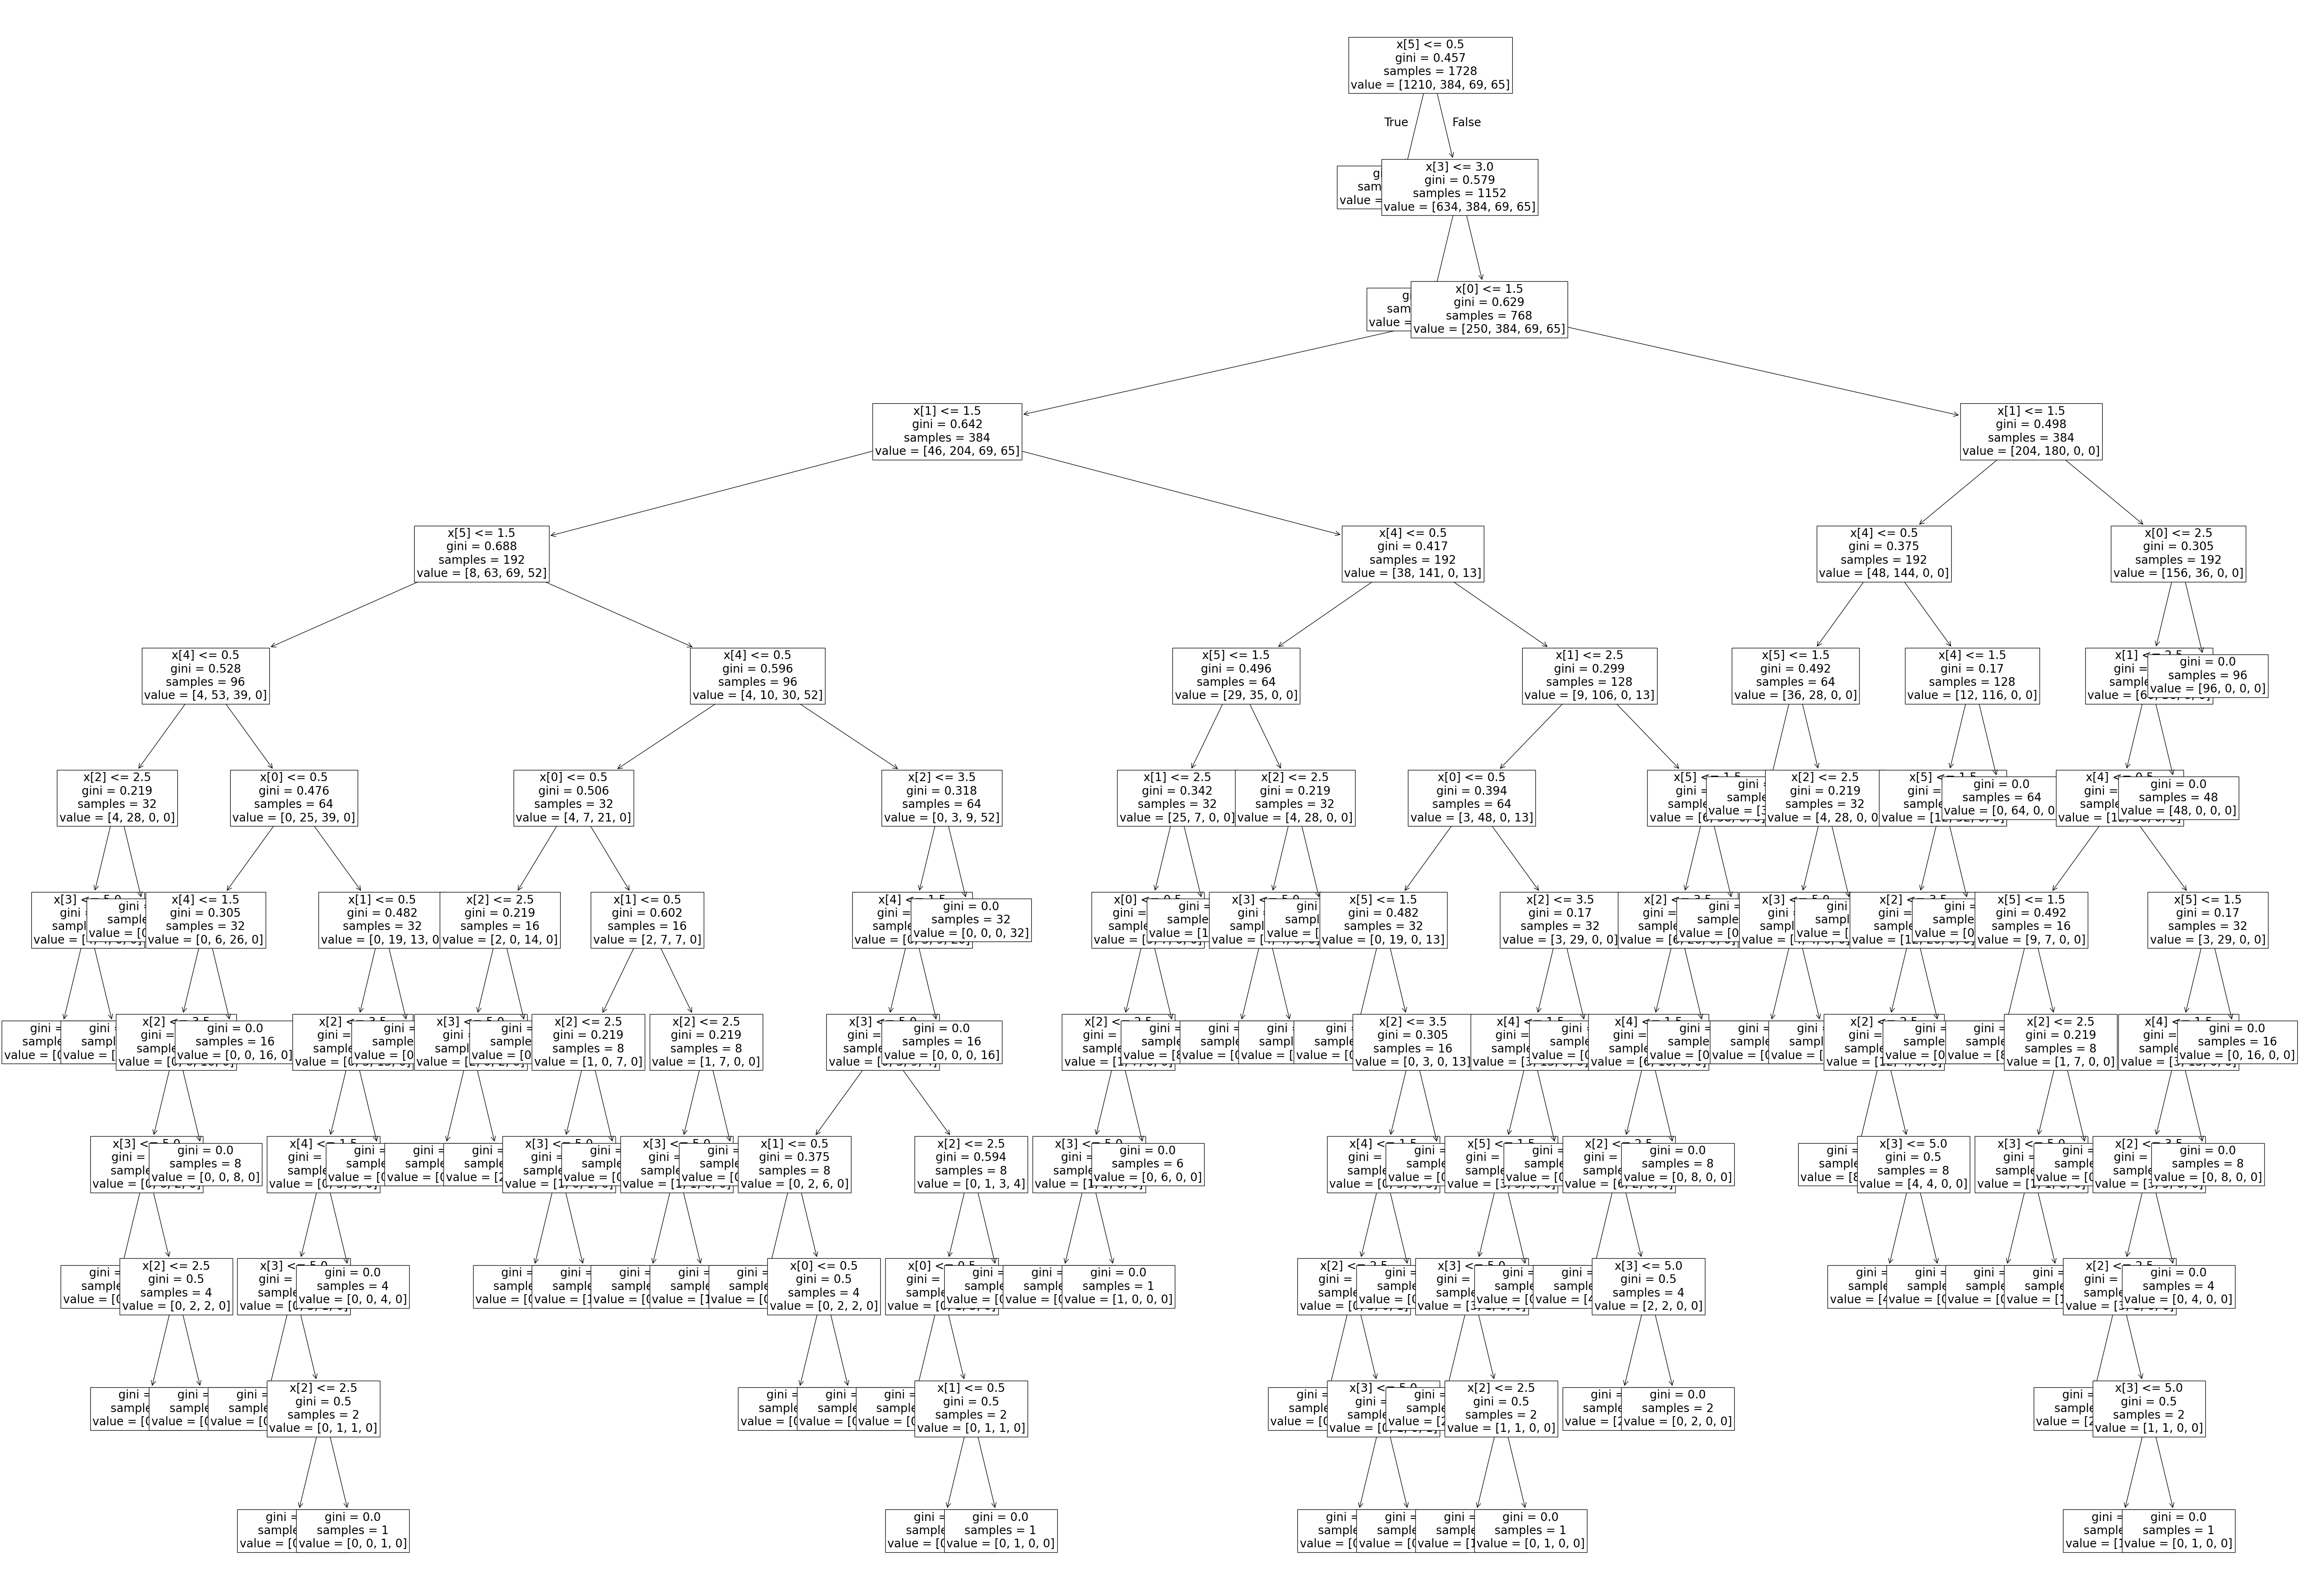

In [205]:
# Cars Full Tree
plt.figure(figsize=(70, 50))
cars_clf = train_tree(X_cars, y_cars)
display(tree.plot_tree(cars_clf, fontsize=20))

[Text(0.5, 0.8333333333333334, 'x[11] <= 0.5\ngini = 0.474\nsamples = 435\nvalue = [267, 168]'),
 Text(0.25, 0.5, 'x[7] <= 0.5\ngini = 0.038\nsamples = 258\nvalue = [253, 5]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.016\nsamples = 249\nvalue = [247.0, 2.0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.444\nsamples = 9\nvalue = [6, 3]'),
 Text(0.75, 0.5, 'x[32] <= 0.5\ngini = 0.146\nsamples = 177\nvalue = [14.0, 163.0]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.041\nsamples = 145\nvalue = [3, 142]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.451\nsamples = 32\nvalue = [11, 21]')]

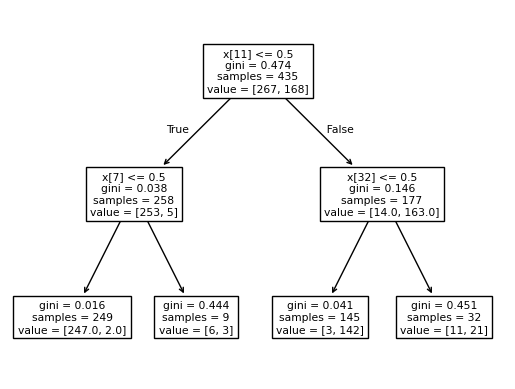

In [207]:
# Small Voting Tree

voting_clf = train_tree(X_voting, y_voting, 2)
tree.plot_tree(voting_clf)

[Text(0.4, 0.8333333333333334, 'x[5] <= 0.5\ngini = 0.457\nsamples = 1728\nvalue = [1210, 384, 69, 65]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 576\nvalue = [576, 0, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= 3.0\ngini = 0.579\nsamples = 1152\nvalue = [634, 384, 69, 65]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 384\nvalue = [384, 0, 0, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.629\nsamples = 768\nvalue = [250, 384, 69, 65]')]

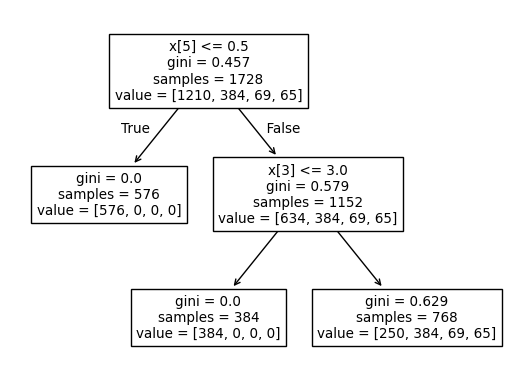

In [208]:
# Small Cars Tree

cars_clf = train_tree(X_cars, y_cars, 2)
tree.plot_tree(cars_clf)

#### Discussion 
Discuss what the Trees have learned on the 2 data sets (i.e. look at the induced trees and describe what "rules" they discovered). How do the important features you would think about correspond the the "feature_importances_"

** Your discussion goes here **

For voting, it appears that question 12, the question about `synfuels-corrporation-cutback`, is the most signifigant classifier between republican and democrat, followed up by the question about `anti-satellite-test-ban`. It appears that for cars, the most important attribute is safety, if the safty is lower than 0.5, then the car quality is unacceptable. I feel like it makes a lot of sense for the most telling aspect of a car's quality be the saftey of the car. However, for the voting dataset, I maybe would have expected more general overall classifiers, rather than one or 2 very specific projects and how people feel about them.

### 2.4 (5%) Other Parameters
- For either of the data sets above experiment and discuss using a different split criterion (Compare Entropy and Log-loss with Gini)

Gini Accuracy: 0.9797687861271677


[Text(0.6120426829268293, 0.9615384615384616, 'x[5] <= 0.5\ngini = 0.466\nsamples = 1382\nvalue = [955, 319, 58, 50]'),
 Text(0.5998475609756098, 0.8846153846153846, 'gini = 0.0\nsamples = 457\nvalue = [457, 0, 0, 0]'),
 Text(0.6059451219512195, 0.9230769230769231, 'True  '),
 Text(0.6242378048780488, 0.8846153846153846, 'x[3] <= 3.0\ngini = 0.584\nsamples = 925\nvalue = [498.0, 319.0, 58.0, 50.0]'),
 Text(0.618140243902439, 0.9230769230769231, '  False'),
 Text(0.6120426829268293, 0.8076923076923077, 'gini = 0.0\nsamples = 302\nvalue = [302, 0, 0, 0]'),
 Text(0.6364329268292683, 0.8076923076923077, 'x[0] <= 1.5\ngini = 0.624\nsamples = 623\nvalue = [196, 319, 58, 50]'),
 Text(0.38871951219512196, 0.7307692307692307, 'x[1] <= 1.5\ngini = 0.635\nsamples = 318\nvalue = [38.0, 172.0, 58.0, 50.0]'),
 Text(0.20121951219512196, 0.6538461538461539, 'x[5] <= 1.5\ngini = 0.684\nsamples = 158\nvalue = [7.0, 55.0, 58.0, 38.0]'),
 Text(0.08231707317073171, 0.5769230769230769, 'x[4] <= 0.5\ngini = 

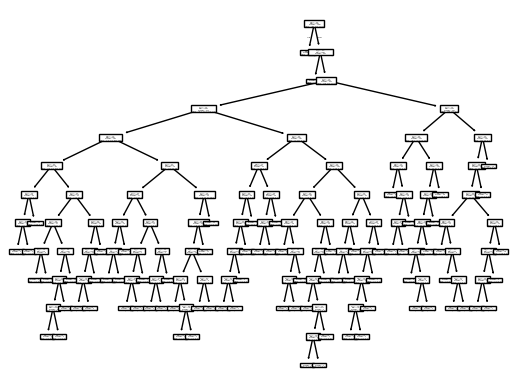

In [237]:
# Experiment with criterion parameter
x_train, x_test, y_train, y_test = train_test_split(X_cars, y_cars, test_size=0.2)
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(x_train, y_train)
print("Gini Accuracy:", clf_gini.score(x_test, y_test))
display(tree.plot_tree(clf_gini))


Entropy Accuracy: 0.9710982658959537


[Text(0.6115384615384616, 0.9615384615384616, 'x[5] <= 0.5\nentropy = 1.207\nsamples = 1382\nvalue = [969.0, 304.0, 60.0, 49.0]'),
 Text(0.5961538461538461, 0.8846153846153846, 'entropy = 0.0\nsamples = 475\nvalue = [475, 0, 0, 0]'),
 Text(0.6038461538461539, 0.9230769230769231, 'True  '),
 Text(0.6269230769230769, 0.8846153846153846, 'x[3] <= 3.0\nentropy = 1.493\nsamples = 907\nvalue = [494.0, 304.0, 60.0, 49.0]'),
 Text(0.6192307692307693, 0.9230769230769231, '  False'),
 Text(0.6115384615384616, 0.8076923076923077, 'entropy = 0.0\nsamples = 293\nvalue = [293, 0, 0, 0]'),
 Text(0.6423076923076924, 0.8076923076923077, 'x[0] <= 1.5\nentropy = 1.648\nsamples = 614\nvalue = [201.0, 304.0, 60.0, 49.0]'),
 Text(0.4076923076923077, 0.7307692307692307, 'x[1] <= 1.5\nentropy = 1.717\nsamples = 310\nvalue = [35.0, 166.0, 60.0, 49.0]'),
 Text(0.2076923076923077, 0.6538461538461539, 'x[5] <= 1.5\nentropy = 1.759\nsamples = 157\nvalue = [7.0, 50.0, 60.0, 40.0]'),
 Text(0.08461538461538462, 0.576

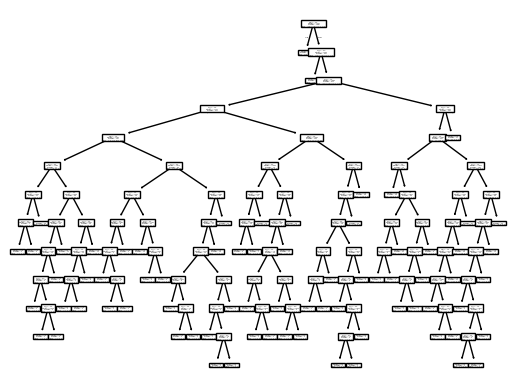

In [238]:
# Entropy (Information Gain)
x_train, x_test, y_train, y_test = train_test_split(X_cars, y_cars, test_size=0.2)
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(x_train, y_train)
print("Entropy Accuracy:", clf_entropy.score(x_test, y_test))
display(tree.plot_tree(clf_entropy))

#### Discussion
How does using different split criteria (entropy, log-loss, and gini) affect accuracy, tree structure, and feature importance?

** Your discussion goes here **

For the accuracy between Gini and Entropy, for this dataset, Gini seemed to almost always be more acurrate or the same ammount of accurate when doing a training test split of 80-20. When it comes to the overall tree structure shape, the Gini tree and the Entropy actually look quite simular when comparing the first 2-3 main levels of the tree. As far as feature importance, both trees have the fith element as the most important feature (safety) which makes a lot of sense and I'm glad for the consistancy.

## 3 Overfit Avoidance with Decision Trees  

Above, you found typical training and test set scores for the Cars data set when the tree is induced as far as it can go (until classes are pure or there are no more data or attributes to split on).  This usually leads to great training set scores but can potentially overfit and get lower accuracy on the test set.  You will now experiment with methods which can help avoid overfit and which could lead to better test set accuracy (though training set accuracy may decrease).  

### 3.1 Smaller and Simpler Trees (20%) 
- tree_: [Read about](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py) the tree_ attribute with its sub attributes and methods allowing you to interact with your learned tree.  You don't have to do any specific task for this part.
- Use an 80/20 train/test split for all experiments in this part and induce (learn/fit) the full tree for Cars.
- For the fully induced tree print out
    - Training set accuracy
    - Test set accuracy
    - Total number of nodes (clf.tree_.node_count)
    - Maximum tree depth (clf.tree_.max_depth)
- Experiment with the following parameters which lead to smaller and/or simpler trees which can help with overfit.  Try a few different values of each parameter and compare their train and test set accuracies and number of nodes and depth with the fully induced tree.  If you are not sure how parameters are actually working, print some trees to see their effect.  Due to the simplicity of the Cars data set you may not see as great of accuracy improvements as you would for cases where overfit is more prominent.  
    - min_samples_leaf
    - min_samples_split
    - min_impurity_decrease
- Try these parameters also, but note that they could lead to underfit
    - max_depth
    - max_leaf_nodes
    - max_features

In [2]:
# Explore different overfit parameters

#### Discussion
How did the methods used above help avoid overfit? How do you know? How did they affect accuracy (training and test) and tree structure? Which parameters helped the most with each dataset? How do you know?

** Your discussion goes here **

### 3.2 (10%) Tree Reduction
Another approach to avoiding overfit is using pruning to reduce fully induced trees.  Induce the tree fully for Cars (no simplifying parameters such as max_depth).  Prune by setting the [ccp_alpha](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py) parameter to a positive value. This parameter controls how aggressive the pruning is. Try some small values (e.g. ,001, ,005, etc.) and try to find and report the value which works the best.  Make a table with at least 5 ccp_alpha values and for each value include
- Training set accuracy (you chooses the size of the train/test split)
- Test set accuracy
- Total number of nodes (clf.tree_.node_count)
- Maximum tree depth (clf.tree_.max_depth)

In [ ]:
# Pruning

#### Discussion
How did the pruning parameter ccp_alpha affect accuracy and tree structure? How does that compare to the methods above?

** Your discussion goes here **

## 4. Decision Tree Regression
### 4.1 (15%) Learn a real-world regression data set of your choice (not already used in this or previous labs)
- Report tree statistics (# of nodes, # of leaf nodes, max depth)
- Report MAE on the training and test set (you choose the size of the train/test split)
- Report the DT regressor score for the training and test set.  Note that for the DT regressor this score is the coefficient of determination. Google it if you are curious.

In [ ]:
#Learn regression data set
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

#### Discussion
Discuss your choice of dataset and regression feature. Also discuss the items listed above in 4.1

** Your discussion goes here **

## 5. (Optional 15% extra credit) Code up your own C4.5 Decision Tree Learner 
Implement the C4.5 algorithm discussed in class and in the slides, NOT the CART algorithm.  Below is a scaffold you could use if you want. Requirements for this task:
- Your model should support the methods shown in the example scaffold below.
- Use standard information gain as your basic attribute evaluation metric.  Note that C4.5 would usually augment information gain with a mechanism to penalize statistically insignificant attribute splits to avoid overfit (e.g. early stopping, gain ratio, etc.), but you are not required to do that.
- Include the ability to handle unknown attributes by making "unknown" a new attribute value when needed.
- You do not need to handle real valued attributes.
- It is a good idea to use simple data set (like the pizza homework), which you can check by hand, to test each detailed step of your algorithm to make sure it works correctly. 
- Run your algorithm on the voting data set above with unknown attributes and compare your results with CART.

Discussion

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class DTClassifier(BaseEstimator,ClassifierMixin):

    def __init__(self,counts=None):
        """ Initialize class with chosen hyperparameters.
        Args:
        Optional Args (Args we think will make your life easier):
            counts: A list of Ints that tell you how many types of each feature there are
        Example:
            DT  = DTClassifier()
            or
            DT = DTClassifier(count = [2,3,2,2])
            Dataset = 
            [[0,1,0,0],
            [1,2,1,1],
            [0,1,1,0],
            [1,2,0,1],
            [0,0,1,1]]

        """

    def fit(self, X, y):
        """ Fit the data; Make the Decision tree

        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
            y (array-like): A 1D numpy array with the training targets

        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)

        """

        return self

    def predict(self, X):
        """ Predict all classes for a dataset X

        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets

        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        pass


    def score(self, X, y):
        """ Return accuracy(Classification Acc) of model on a given dataset. Must implement own score function.

        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 1D numpy array of the targets 
        """
        return 0

In [ ]:
# Optional Debugging Dataset - Pizza Homework
# pizza_dataset = np.array([[1,2,0],[0,0,0],[0,1,1],[1,1,1],[1,0,0],[1,0,1],[0,2,1],[1,0,0],[0,2,0]])
# pizza_labels = np.array([2,0,1,2,1,2,1,1,0])